# About: Elasticsearch構築手順への適用例

このディレクトリ中のNotebook群は、 https://github.com/NII-cloud-operation/Literate-computing-Elasticsearch にて公開している *Literate Computing for Reproducible Infrastructure - Elasticsearch Practice* をデモ環境上で簡単にお試しできるように編集したものです。

<font color="forestgreen">Elasticsearch 用の Notebook群はまだまだ荒削りです。
お試しになってお気づきになった点、改善点などありしたら、是非 プルリクエスト をおねがいします。また、複雑なNotebook群をどう構成するかについては [Literate-computing-Hadoop](https://github.com/NII-cloud-operation/Literate-computing-Hadoop) の事例を御覧になっていただけると幸いです。
</font>

## どう試せばいいの？

このNotebook群は、複数のNotebookから構成されており、順番にNotebookを開いてそれぞれを読みながら実行いただく必要があります。

各Notebook間の関係については、本Notebook中の[#お手本Notebookの一覧](#お手本Notebookの一覧)をご覧ください。

## **<font color="red">この環境における制限 (必ずお読みください)</font>**

このデモ環境の利用にあたり、いくつかの注意事項があります。ご了承ください。

- このNotebook群を実行することで起動される仮想マシン（Elasticsearch の構築先の仮想マシンであって、このNotebook群を実行しているマシンではありません）は、<font color="red">**起動後55分間で自動的に破棄されます**</font>。
- 起動したElasticsearchには、Notebookを参考にしながら自由にデータを追加、検索することができますが、**機微情報などのアップロードはご遠慮ください**。
- インスタンスの起動、停止などを含むこの環境での利用者の活動は全て記録させていただいております。ご了承ください。
- このデモ環境のNotebookの公開などはご遠慮ください。公開される場合はGitHub https://github.com/NII-cloud-operation/Literate-computing-Elasticsearch をベースにご利用ください。

----


# Original: Notebooks for Elasticsearch README

Literate Computing for Reproducible Infrastructure: Elasticsearch運用をJupyter + Ansibleでおこなう際のお手本Notebookです。

このリポジトリでは、Elasticsearch( https://www.elastic.co/jp/products/elasticsearch )の環境を構築し、運用するためのNotebook例を紹介しています。

**なお、これらのNotebookはNIIクラウドチーム内で行っている作業の考え方を示すためのもので、環境によってはそのままでは動作しないものもあります。**

----

[![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)](http://creativecommons.org/licenses/by/4.0/)

Literate-computing-Elasticsearch (c) by National Institute of Informatics

Literate-computing-Elasticsearch is licensed under a
Creative Commons Attribution 4.0 International License.

You should have received a copy of the license along with this
work. If not, see <http://creativecommons.org/licenses/by/4.0/>.

## Elasticsearchとは？
Elasticsearchは、リアルタイムにデータを検索/分析するための分散型の全文検索エンジンであり、次のような特徴を持っています。

1. __リアルタイム分析__  
収集したデータをリアルタイムに検索/分析することができます。  
また、高速に検索できるため、他のBIツールのように事前に分析項目を決めなくても、すでに蓄積されたデータに対してインタラクティブな分析をすることが可能です。

2. __クラスタリングが容易__  
クラスタリングを想定した設計が行われており、他のミドルウェアを利用せずにクラスタを組むことができます。  
ノードを追加することによりスケールアウトできるため、必要な処理性能や可用性などに応じたコントロールが容易です。

3. __ドキュメント指向、スキーマフリー__  
データベースであれば、データをレコードの単位で管理しますが、
Elasticsearchではドキュメントと呼ばれる構造化されたJSONデータの形式で管理します。  
すべてのフィールドはデフォルトでインデックスされるため、簡単かつ高速に検索できます。  
また、このドキュメントはスキーマを決めずに投入することもできるため、すぐに使い始めることができます。  
なお、ログデータのような構造化されていないデータを投入する際には、Logstashなどを用いてJSON形式に加工して保持することになります。

4. __REST API__  
Elasticsearchはシンプルで使いやすいREST APIを提供しています。  
検索処理や登録処理（indexing）だけでなく、インデックスやマッピングの定義、クラスタ管理やメンテナンスなど、Elasticsearchのクラスタ・ノードに対する操作は、ほぼすべてAPIを通じて実施できます。

5. __オープンソース__  
Elasticsearchはオープンソース製品として開発されています。  
ライセンスはApache License Version 2.0です。  
ただし、一部のプラグインを利用するためにはサブスクリプション契約（兼サポート契約）を結ぶ必要があります。

参考）[Elasticsearch公式ページ]( https://www.elastic.co/jp/products )

## 前提条件
このNotebookで前提にしているOS/ミドルウェアのバージョンは次の通りです。

| OS/ミドルウェア | バージョン |
|----|----|
|Elasticserach|elasticsearch-5.0.0-1.noarch|
|Logstash|logstash-5.0.0-1.noarch|
|Ansible|2.2.0.0|
|OS|CentOS Linux release 7.2.1511|
|JDK|jdk1.8.0_112-1.8.0_112-fcs.x86_64|


# お手本Notebook

お手本NotebookはこのNotebookと同じディレクトリにあります。

Notebook名は `XX_(XX_)Notebook名` の形で表現され、Jupyter Notebookのファイル一覧の上でも整理された形で表示できるようにしてあります。

## お手本Notebookの一覧

お手本Notebookとそれぞれの利用局面の関係については、以下のフローを参考にしてください。

それぞれの箱はNotebookを表しており、**タイトル部分をクリックすることでNotebookを開くことができます。**
グレーアウトされたNotebookはこのデモ環境ではお試しいただくことはできません。

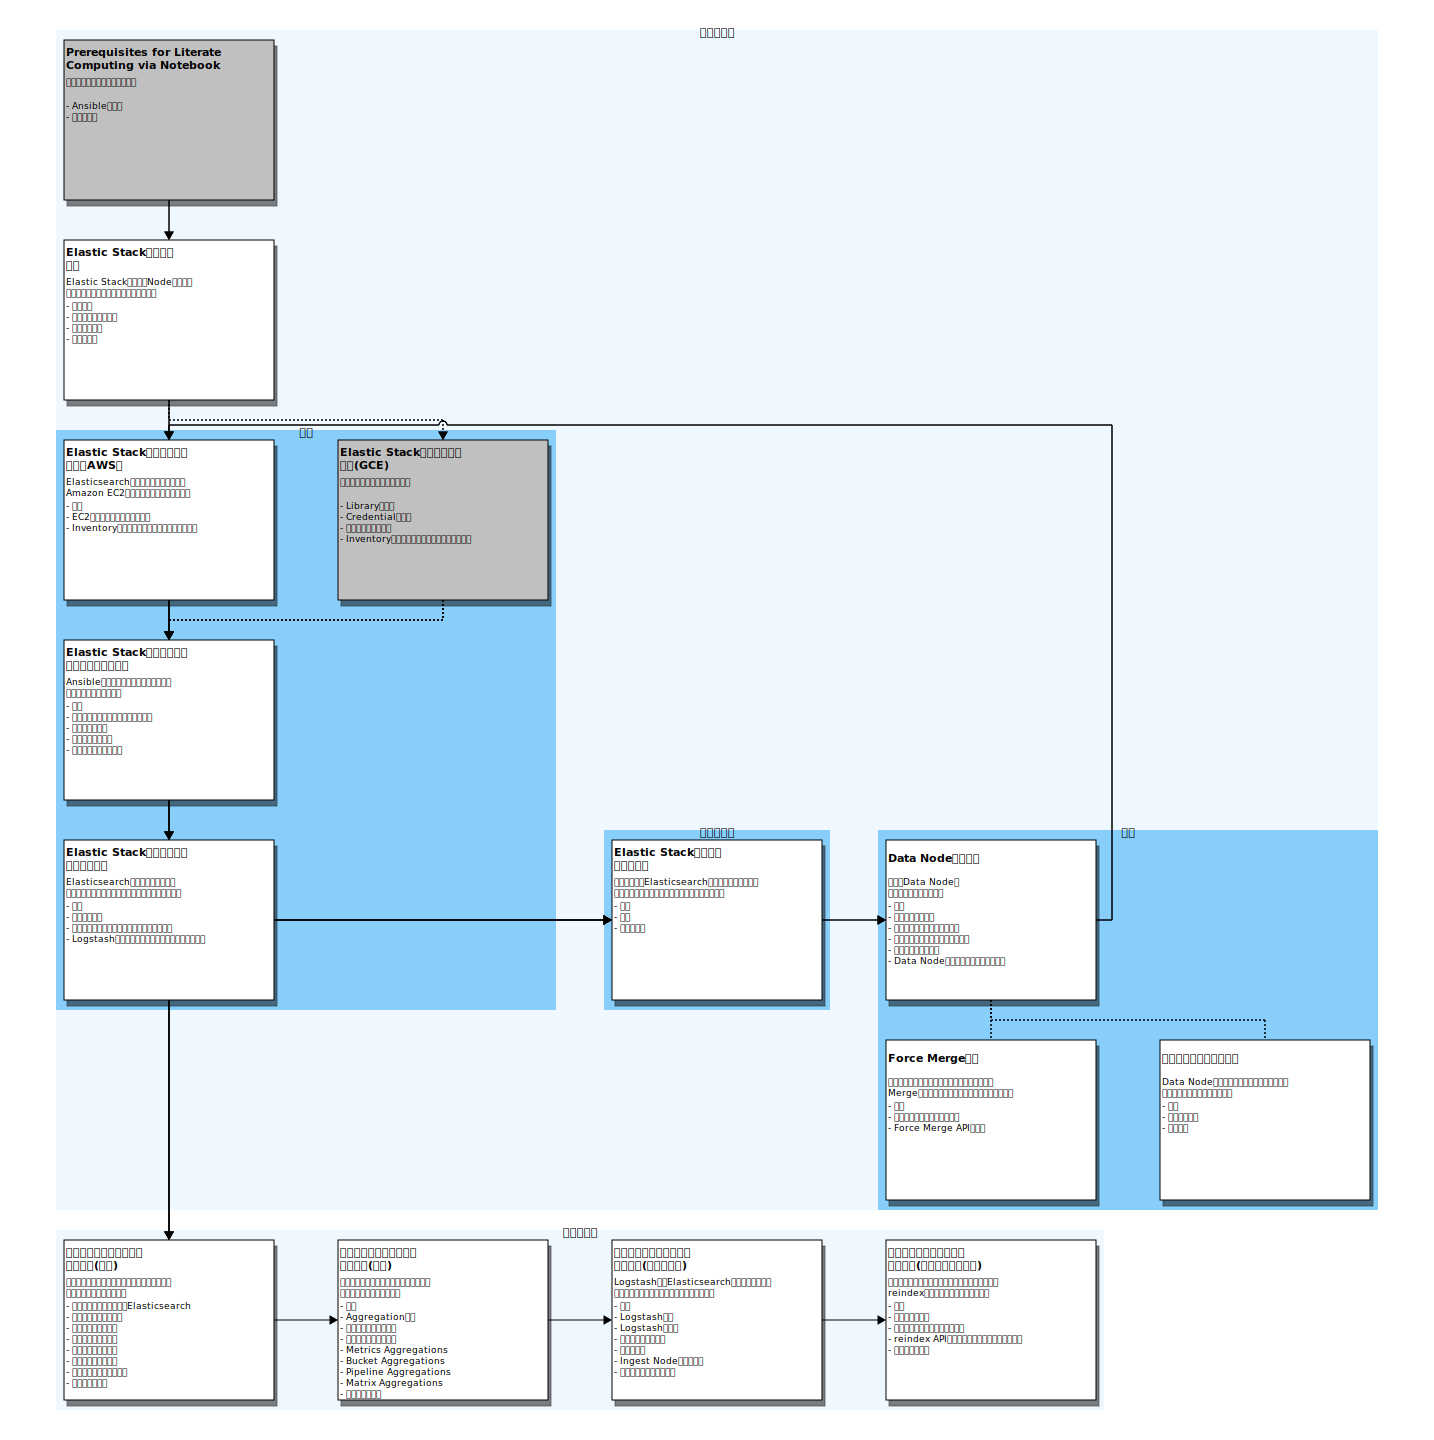

In [1]:
from IPython.display import SVG
SVG(filename='images/notebooks-filled.svg')

*構築*フェーズは、構築・運用対象とするElasticsearchのためのマシンを準備し、ソフトウェアのインストール、設定を行います。

*確認・診断*フェーズは、構築したElasticsearchの日々の運用や、問題発生時の健康診断を行います。

*改善*フェーズは、健康診断の結果、Nodeの追加により容量を増やしたり、データをクリーンアップしたりといった操作を行います。

## お手本Notebookの目次一覧

各Notebookの詳細な目次を参照するには、以下のセルを実行(`Run cell`)してください。Notebookファイルへのリンクが表示されます。

In [2]:
%run scripts/get-display-contents.py
display_notebook_contents()